In [2]:
%cd /Users/Brett/Code/bricolage-dev/
from bricolage import lineage, threshold3, graph
from bricolage.analysis_ext import CausalFlowAnalyzer, Information, MutualInfoAnalyzer

/Users/brett/Dropbox/Code/bricolage-dev


In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import numpy as np
from IPython.display import Image

In [45]:
def show_network(n):
    graph.save_network_as_fullgraph(net01, name='test')
    return Image(filename='network-test.png', height=500) 

In [46]:
treat = lineage.Treatment("/Users/Brett/Desktop/three/08-(a-and-b)-or-(a-and-c)-or-(not-a-and-not-b-and-not-c)/")
rep01 = treat.replicates[0]
lin01 = rep01.get_lineage()

1.0
saving test


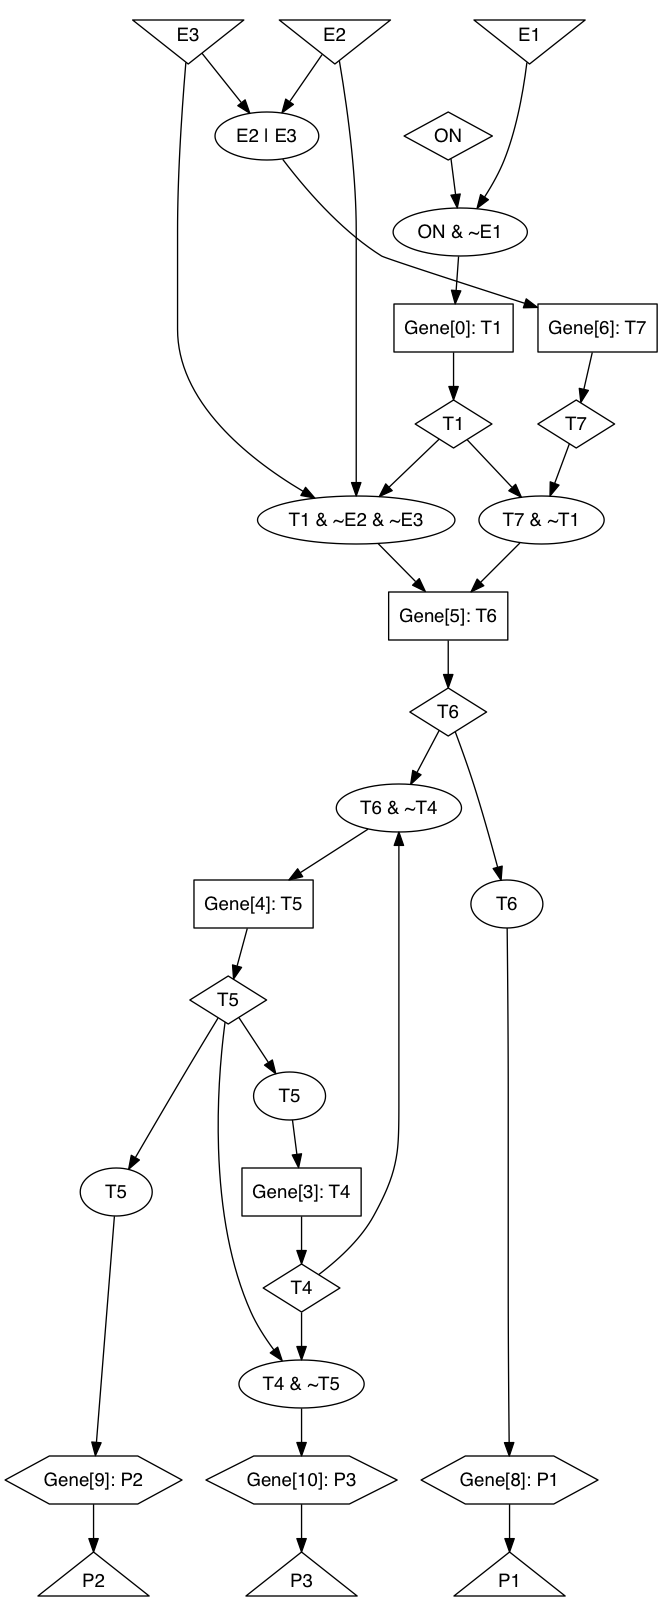

In [47]:
net01 = lin01.population.get_best()[10]
print net01.fitness
show_network(net01)

In [48]:
anc = lin01.get_ancestry(net01.identifier)

In [49]:
lin01.targets[0].as_array()

array([[ 1.  ,  0.5 ,  0.25],
       [ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.5 ,  0.25],
       [ 0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.5 ,  0.25],
       [ 0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.5 ,  0.25]])

In [54]:
cf = CausalFlowAnalyzer(lin01.world, [0, .5, .25])
mf = MutualInfoAnalyzer(lin01.world, [1, 0, 0, 1, 0, 1, 0, 1])

In [55]:
joint = cf.analyse_collection(anc)
jointm = mf.analyse_collection(anc)
inf = Information(joint)
infm = Information(jointm)

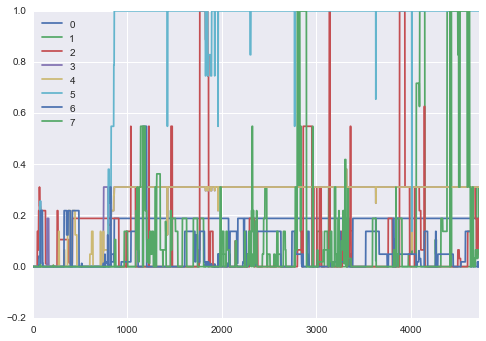

In [56]:
arr = np.asarray(infm)
arr.shape = arr.shape[0], arr.shape[1]
#arr = arr.sum(axis=2)
pd.DataFrame(arr).plot()

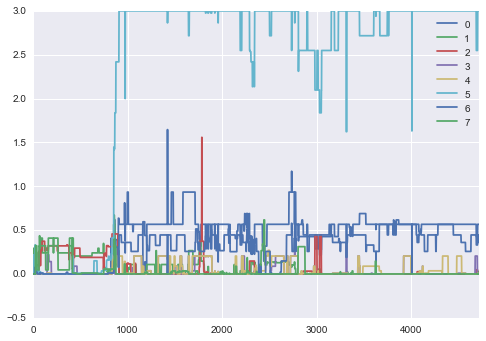

In [58]:
arr = np.asarray(inf)
summed = arr.sum(axis=2)
#summed = summed.sum(axis=1) / 3
pd.DataFrame(summed).plot()